In [16]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [4]:
np.random.seed(0)


In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "The number fo images is not equal to the the number of labesl"
assert(X_test.shape[0] == y_test.shape[0]), "The number fo images is not equal to the the number of labesl"
assert(X_train.shape[1:] == (28, 28)), "The images are not of the correct shape"

In [18]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axis = plt.subplots(nrows = num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
# for i in range(cols):
#     for j in range(num_classes):
#         x_selected = X_train[y_train==j]
#         axis[j][i].imshow(x_selected[random.randint(0, len(x_selected)), :, :], cmap=plt.get_cmap("gray"))
#         axis[j][i].axis("off")
#         if i==2:
#             axis[j][i].set_title(str(j))
#             num_of_samples.append(len(x_selected))

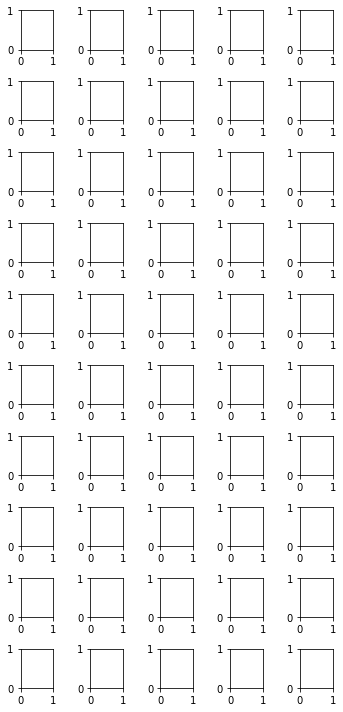

In [19]:
fig

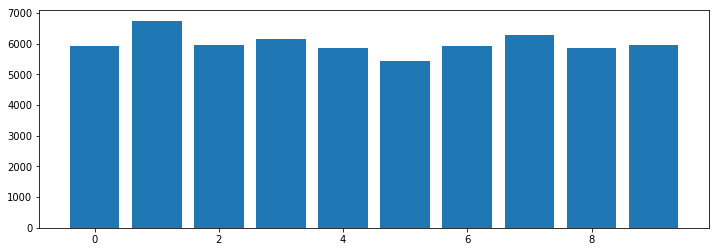

In [9]:
fig = plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
fig

In [20]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
y_train.shape
y_test.shape

(10000, 10)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [13]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 14us/step - loss: 0.5361 - acc: 0.8322 - val_loss: 0.2585 - val_acc: 0.9248
Epoch 2/10
54000/54000 [==============================] - 1s 11us/step - loss: 0.2842 - acc: 0.9179 - val_loss: 0.2208 - val_acc: 0.9355
Epoch 3/10
54000/54000 [==============================] - 1s 11us/step - loss: 0.2538 - acc: 0.9267 - val_loss: 0.2116 - val_acc: 0.9385
Epoch 4/10
54000/54000 [==============================] - 1s 11us/step - loss: 0.2349 - acc: 0.9312 - val_loss: 0.1945 - val_acc: 0.9445
Epoch 5/10
54000/54000 [==============================] - 1s 11us/step - loss: 0.2195 - acc: 0.9347 - val_loss: 0.1917 - val_acc: 0.9432
Epoch 6/10
54000/54000 [==============================] - 1s 11us/step - loss: 0.2186 - acc: 0.9349 - val_loss: 0.2107 - val_acc: 0.9407
Epoch 7/10
54000/54000 [==============================] - 1s 11us/step - loss: 0.2110 - acc: 0.9373 - val_loss: 0.1877 - val_acc:

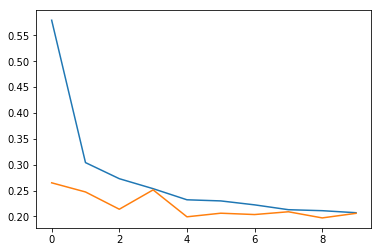

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [19]:
score = model.evaluate(X_test, y_test, verbose=0)

In [20]:
X_test = X_test.reshape(X_test.shape[0], 784)
y_test.shape

(10000, 10)

In [21]:
y_train.shape

(60000, 10)

In [22]:
score

[0.25399341131448744, 0.9284]

In [23]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'

In [24]:
import requests
from PIL import Image

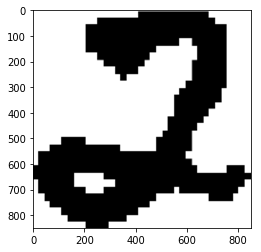

In [25]:
response = requests.get(url, stream=True)
im = Image.open(response.raw)
plt.imshow(im)
plt.show()

In [26]:
img_array = np.asarray(im)

In [27]:
img_array.shape

(850, 850, 4)

In [29]:
import cv2

In [44]:
resized = cv2.resize(img_array, (28, 28))
gray_scale=cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

In [45]:
gray_scale.shape

(28, 28)

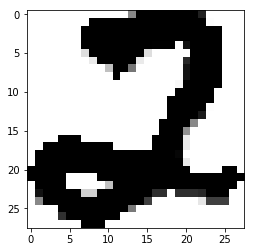

In [46]:
plt.imshow(gray_scale, cmap=plt.get_cmap("gray"))
plt.show()

In [58]:
final_image = cv2.bitwise_not(gray_scale)

In [59]:
final_image = final_image/255
final_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4627451 , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.87058824, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

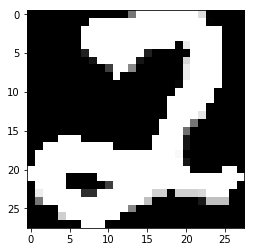

In [54]:
plt.imshow(final_image, cmap=plt.get_cmap("gray"))
plt.show()

In [60]:
final_image = final_image.reshape(1, 784)

In [61]:
final_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4627451 , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.87058824, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [69]:
prediction = model.predict_classes(final_image)

In [70]:
prediction

array([2])

In [71]:
history.history['acc']

[0.8175740737330031,
 0.9118333326445686,
 0.9194074118578875,
 0.9239629630689268,
 0.9307407412264083,
 0.9312962973559344,
 0.9322037043394866,
 0.935092591577106,
 0.9360555545047478,
 0.9368518518077003]